In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv(r"C:\Users\insre\Downloads\titanic_dataset_fine_tuning.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df1['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [38]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
df = df1

In [49]:
df = df.drop('Embarked',axis=1)
df = df.drop('Age',axis=1)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

In [50]:

from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
num_columns1 =df1[[  'Embarked', ]]
num_columns =df1[[  'Age', ]]
imputer1 = imputer1.fit(num_columns1)
num_columns1 = imputer1.transform(num_columns1)
num_columns1 = pd.DataFrame(num_columns1,columns= [ 'Embarked'])




imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(num_columns)
num_columns = imputer.transform(num_columns)
num_columns = pd.DataFrame(num_columns,columns= [ 'Age'])
num_columns

df = pd.concat([num_columns, df], axis =1)
df = pd.concat([num_columns1, df], axis =1)
df.isna().sum()




Embarked         0
Age              0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

In [51]:
df = df.drop('Cabin',axis=1)
df = df.drop('PassengerId',axis=1)
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)
df

,Embarked,Age,Survived,Pclass,Sex,SibSp,Parch,Fare
0,S,22.0,0,3,male,1,0,7.2500
1,C,38.0,1,1,female,1,0,71.2833
2,S,26.0,1,3,female,0,0,7.9250
3,S,35.0,1,1,female,1,0,53.1000
4,S,35.0,0,3,male,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,S,27.0,0,2,male,0,0,13.0000
887,S,19.0,1,1,female,0,0,30.0000
888,S,28.0,0,3,female,1,2,23.4500
889,C,26.0,1,1,male,0,0,30.0000


In [52]:
df.isna().sum()

Embarked    0
Age         0
Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df

,Embarked,Age,Survived,Pclass,Sex,SibSp,Parch,Fare
0,2,22.0,0,3,1,1,0,7.2500
1,0,38.0,1,1,0,1,0,71.2833
2,2,26.0,1,3,0,0,0,7.9250
3,2,35.0,1,1,0,1,0,53.1000
4,2,35.0,0,3,1,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,2,27.0,0,2,1,0,0,13.0000
887,2,19.0,1,1,0,0,0,30.0000
888,2,28.0,0,3,0,1,2,23.4500
889,0,26.0,1,1,1,0,0,30.0000


In [54]:
# hold out techinque
y = df['Survived']
x = df.drop(['Survived',], axis =1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size =0.20)

In [55]:
from sklearn.linear_model import LogisticRegression
logistic_regression =LogisticRegression()
model = logistic_regression.fit(x_train,y_train)

In [56]:
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score=:',accuracy_score(y_test,prediction))
print('precision_score=:',precision_score(y_test,prediction))
print('recall_score=:',recall_score(y_test,prediction))
print('f1_score=:',f1_score(y_test,prediction))

accuracy_score=: 0.8100558659217877
precision_score=: 0.7857142857142857
recall_score=: 0.7432432432432432
f1_score=: 0.7638888888888888


In [57]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

In [58]:
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors = k ,metric ='euclidean')
    classifier.fit(x_train,y_train)
    y_prediction = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_prediction)
    metric_k.append(acc)

metric_k

[0.7262569832402235,
 0.7206703910614525,
 0.7206703910614525,
 0.7318435754189944,
 0.7262569832402235,
 0.7150837988826816,
 0.7262569832402235,
 0.7150837988826816,
 0.7430167597765364,
 0.7150837988826816,
 0.7318435754189944,
 0.7318435754189944]

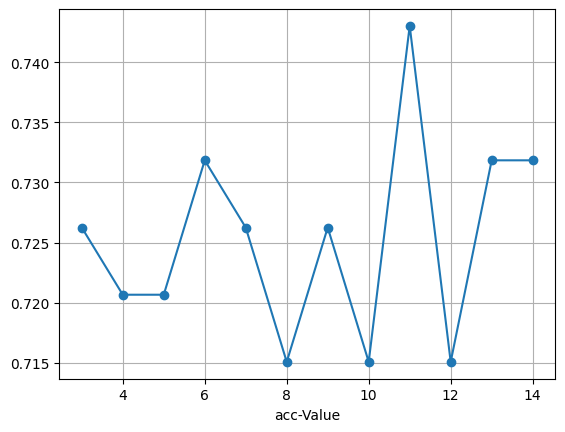

In [59]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K-Value")
plt.xlabel("acc-Value")
plt.grid()

In [60]:
classifier =KNeighborsClassifier(n_neighbors = 13 ,metric ='euclidean')
classifier.fit(x_train,y_train)
y_prediction = classifier.predict(x_test)
acc = accuracy_score(y_test, y_prediction)
metric_k.append(acc)
print('accuracy_score=:',accuracy_score(y_test,y_prediction))
print('precision_score=:',precision_score(y_test,y_prediction))
print('recall_score=:',recall_score(y_test,y_prediction))
print('f1_score=:',f1_score(y_test,y_prediction))

accuracy_score=: 0.7318435754189944
precision_score=: 0.75
recall_score=: 0.527027027027027
f1_score=: 0.619047619047619


In [61]:
from sklearn.svm import SVC
svm_class = SVC(kernel='linear')
svm_class = svm_class.fit(x_train,y_train)
svm_class
prediction = svm_class.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score=:',accuracy_score(y_test,prediction))

accuracy_score=: 0.7821229050279329


In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt =dt.fit(x_train,y_train)
prediction = dt.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score=:',accuracy_score(y_test,prediction))

accuracy_score=: 0.770949720670391


In [63]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
dt =dt.fit(x_train,y_train)
prediction = dt.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score=:',accuracy_score(y_test,prediction))

accuracy_score=: 0.8212290502793296


In [65]:
#K-fold cross validation

from sklearn.model_selection import KFold
kfold_val = KFold(10)


In [66]:
for train_index,test_index in kfold_val.split(x,y):
    print('TRaining Index -',train_index)
    print('Validation Index -',test_index)

TRaining Index - [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [67]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(model,x,y,cv=kfold_val)

c:\Users\insre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\insre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [68]:
cv_result

array([0.78888889, 0.80898876, 0.7752809 , 0.7752809 , 0.7752809 ,
       0.76404494, 0.76404494, 0.7752809 , 0.84269663, 0.84269663])

In [69]:
np.mean(cv_result)

0.7912484394506867

In [70]:
## stratified cross Validation
from sklearn.model_selection import StratifiedKFold
sfold_val = StratifiedKFold(n_splits=10)

In [71]:
for train_index,test_index in sfold_val.split(x,y):
    print('TRaining Index -',train_index)
    print('Validation Index -',test_index)

TRaining Index - [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [72]:

skv_result = cross_val_score(model,x,y,cv=sfold_val)
skv_result

c:\Users\insre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\insre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

array([0.78888889, 0.79775281, 0.76404494, 0.82022472, 0.78651685,
       0.7752809 , 0.78651685, 0.78651685, 0.80898876, 0.84269663])

In [73]:
np.mean(skv_result)

0.7957428214731586